In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/accident data.csv")

In [6]:
df.head(10)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1.0,2.0,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1.0,3.0,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1.0,4.0,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1.0,2.0,Dry,NaN,Urban,NaN,Other vehicle
5,200701BS67159,Serious,18-09-2019,51.497750,Daylight,Kensington and Chelsea,-0.192556,2.0,3.0,Dry,Single carriageway,Urban,Fine no high winds,Car
6,200701BS67207,Serious,05-09-2019,51.501405,Daylight,Kensington and Chelsea,-0.161577,1.0,2.0,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
7,200701BS67370,Fatal,03-10-2019,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car
8,200701BS67515,Slight,31-10-2019,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car
9,200701BS67543,Slight,18-10-2019,51.484539,Daylight,Kensington and Chelsea,-0.175651,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7192 entries, 0 to 7191
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    7192 non-null   object 
 1   Accident_Severity        7191 non-null   object 
 2   Accident Date            7191 non-null   object 
 3   Latitude                 7191 non-null   float64
 4   Light_Conditions         7191 non-null   object 
 5   District Area            7191 non-null   object 
 6   Longitude                7191 non-null   float64
 7   Number_of_Casualties     7191 non-null   float64
 8   Number_of_Vehicles       7191 non-null   float64
 9   Road_Surface_Conditions  7191 non-null   object 
 10  Road_Type                7111 non-null   object 
 11  Urban_or_Rural_Area      7191 non-null   object 
 12  Weather_Conditions       7066 non-null   object 
 13  Vehicle_Type             7191 non-null   object 
dtypes: float64(4), object(10

In [8]:
df.isna().sum()

,0
Index,0
Accident_Severity,1
Accident Date,1
Latitude,1
Light_Conditions,1
District Area,1
Longitude,1
Number_of_Casualties,1
Number_of_Vehicles,1
Road_Surface_Conditions,1


## Data Cleaning

**Convert Data column to datetime**

In [9]:
df['Accident Date'] = df['Accident Date'].str.replace('-', '/', regex=True)
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d/%m/%Y', errors='coerce')

Deal With NA


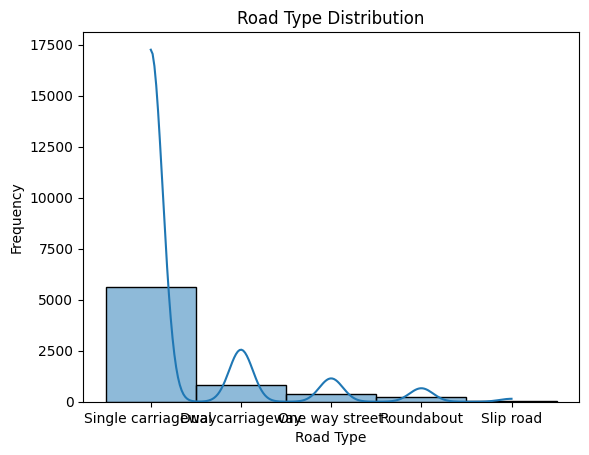

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using seaborn
sns.histplot(df['Road_Type'], kde=True, bins=30)
plt.title("Road Type Distribution")
plt.xlabel("Road Type")
plt.ylabel("Frequency")
plt.show()


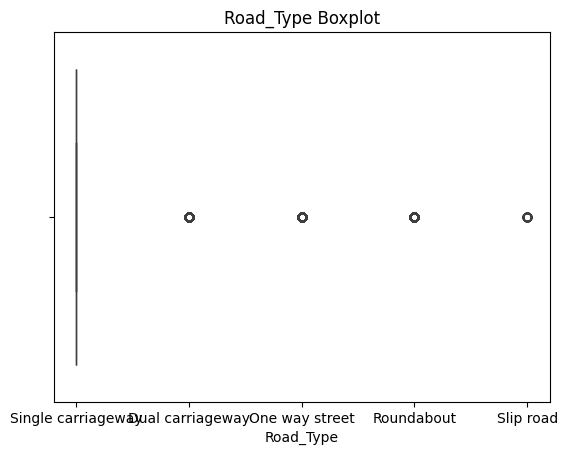

In [11]:
sns.boxplot(x=df['Road_Type'])
plt.title("Road_Type Boxplot")
plt.show()


In [12]:
df["Road_Type"].values

array(['Single carriageway', 'Single carriageway', nan, ...,
       'Dual carriageway', 'Single carriageway', nan], dtype=object)

In [13]:
df["Road_Type"].isna().sum()

np.int64(81)

In [14]:
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])

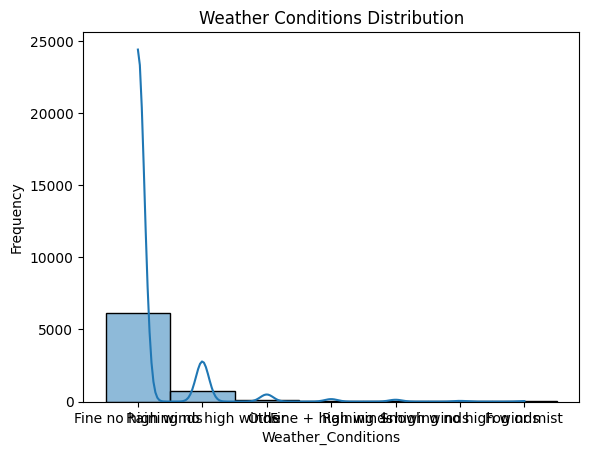

In [16]:
sns.histplot(df['Weather_Conditions'], kde=True, bins=50)
plt.title("Weather Conditions Distribution")
plt.xlabel("Weather_Conditions")
plt.ylabel("Frequency")
plt.show()


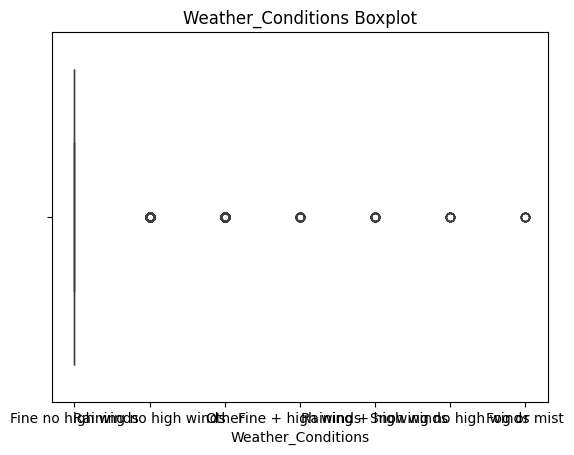

In [17]:
sns.boxplot(x=df['Weather_Conditions'])
plt.title("Weather_Conditions Boxplot")
plt.show()

In [18]:
df["Weather_Conditions"].values


array(['Fine no high winds', 'Raining no high winds', nan, ...,
       'Raining no high winds', 'Fine no high winds', nan], dtype=object)

In [19]:
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])

In [20]:
df = df.dropna()

In [21]:
df = df.drop_duplicates()

In [22]:
df["Weather_Conditions"] = df["Weather_Conditions"].str.title().str.strip().str.replace(r'\s*\+\s*', ' & ', regex=True)
df["Road_Type"] = df["Road_Type"].str.title().str.strip()
df["Light_Conditions"] = df["Light_Conditions"].str.title().str.strip()

In [23]:
road_surface_mapping = {
    "Wet or damp": "Wet",
    "Frost or ice": "Icy",
    "Flood over 3cm. deep": "Flooded"
}

# Apply the mapping
df["Road_Surface_Conditions"] = df["Road_Surface_Conditions"].replace(road_surface_mapping)


In [24]:
district_mapping = {
    "Clackmannshire": "Clackmannanshire",
    "Crewe and ntwich": "Crewe and Nantwich",
    "Blaeu Gwent": "Blaenau Gwent",
    "Stevege": "Stevenage",
    "North Larkshire": "North Lanarkshire",
    "Kingston upon Hull, City of": "Kingston upon Hull",
    "Bristol, City of": "Bristol",
    "Edinburgh, City of": "Edinburgh",
    "Rhondda, Cynon, Taff": "Rhondda Cynon Taff",
}

df["District Area"] = df["District Area"].replace(district_mapping)
df["District Area"] = df["District Area"].str.title()

In [25]:
vehicle_mapping = {
    # Merge all motorcycles into one category
    "Motorcycle 50cc and under": "Motorcycle",
    "Motorcycle 125cc and under": "Motorcycle",
    "Motorcycle over 125cc and up to 500cc": "Motorcycle",
    "Motorcycle over 500cc": "Motorcycle",

    # Merge heavy goods vehicles (HGVs)
    "Goods over 3.5t. and under 7.5t": "Heavy Goods Vehicle (HGV)",
    "Goods 7.5 tonnes mgw and over": "Heavy Goods Vehicle (HGV)",

    # Standardize light goods vehicle (LGV)
    "Van / Goods 3.5 tonnes mgw or under": "Light Goods Vehicle (LGV)",

    # Rename "Data missing or out of range" to "Other Vehicle"
    "Data missing or out of range": "Other Vehicle"
}

# Apply the mapping
df["Vehicle_Type"] = df["Vehicle_Type"].replace(vehicle_mapping)
df["Vehicle_Type"] = df["Vehicle_Type"].str.title()

In [26]:
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - Lights Lit,Kensington And Chelsea,-0.209082,1.0,2.0,Dry,Single Carriageway,Urban,Fine No High Winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington And Chelsea,-0.173647,1.0,2.0,Wet,Single Carriageway,Urban,Raining No High Winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - Lighting Unknown,Kensington And Chelsea,-0.210215,1.0,3.0,Dry,Single Carriageway,Urban,Fine No High Winds,Taxi/Private Hire Car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington And Chelsea,-0.202731,1.0,4.0,Dry,Single Carriageway,Urban,Fine No High Winds,Bus Or Coach (17 Or More Pass Seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - Lights Lit,Kensington And Chelsea,-0.192487,1.0,2.0,Dry,Single Carriageway,Urban,Fine No High Winds,Other Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,200701KD50049,Serious,2019-01-30,51.605551,Daylight,Havering,0.231836,1.0,3.0,Dry,Single Carriageway,Urban,Fine No High Winds,Bus Or Coach (17 Or More Pass Seats)
7187,200701KD50050,Slight,2019-01-16,51.566397,Daylight,Havering,0.176238,1.0,2.0,Wet,Single Carriageway,Urban,Raining No High Winds,Car
7188,200701KD50051,Slight,2019-01-11,51.514277,Darkness - Lights Lit,Havering,0.203012,1.0,2.0,Dry,Single Carriageway,Urban,Fine No High Winds,Car
7189,200701KD50052,Slight,2019-01-08,51.571831,Daylight,Havering,0.183858,1.0,2.0,Wet,Dual Carriageway,Urban,Raining No High Winds,Car


In [27]:
df['Vehicle_Type'].unique()

array(['Car', 'Taxi/Private Hire Car',
       'Bus Or Coach (17 Or More Pass Seats)', 'Other Vehicle',
       'Light Goods Vehicle (Lgv)', 'Motorcycle',
       'Heavy Goods Vehicle (Hgv)', 'Minibus (8 - 16 Passenger Seats)',
       'Pedal Cycle', 'Agricultural Vehicle'], dtype=object)

In [28]:
df.to_csv('cleaned_accidents.csv', index=False)